# STA130 Week 04 Homework

## "Pre-lecture" HW

## 1

The first set of work was to watch the video below:

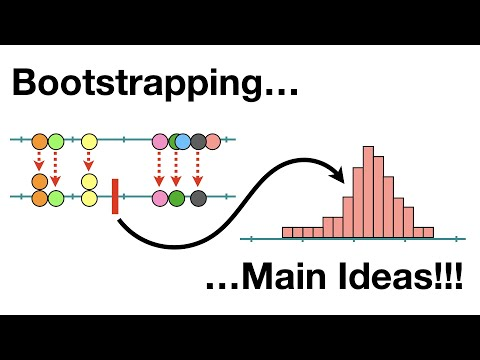

In [4]:
from IPython.display import YouTubeVideo
YouTubeVideo('Xz0x-8-cgaQ', width=800, height=500)

#### Notes from the video (unrelated to question):

Bootstrapping is used to find a mean that better responds to the true population mean. To bootstrap, randomly pick n amounts of data values in a value set sized n, allowing some data values to be picked more than once. Then find the mean of the set of picked values, and repeat the steps many times until you have a huge set of means on the number line, which creates something like a distribution. The more you do it, the more it looks like a normal distribution.

#### Responding to Question 1:

After watching the video above, I found out that there is actually a difference between the "standard error of the mean" and the "standard deviation" of a set of data.

- The standard deviation describes the variability within a dataset, whereas the standard error of the mean shows how much the sample mean is expected to vary from the true population mean.

- SD is useful for understanding spread of data, while the standard error of the mean is used to show the precision of the sample mean compared to the estimate of the population mean.

## 2

From my own knowledge as well as the help of a Chatbot, we can use the "standard error of the mean" to create a 95% confidence interval which "covers 95% of the bootstrapped sample means through:

**1. Calculate the SEM from the original dataset.**

   This is done using the formula: 
       
       SEM = SD / √(n)

**2. Bootstrap resampling:**
   - Create multiple bootstrap samples using the instructions from the video.
   - For each bootstrap sample, calculate the mean.
   - Combine all the means together to form a distribution
   - Calculate the SEM for each bootstrap sample.

**4. Calculate the 95% confidence interval:**

   Construct the confidence interval around the original sample mean by adding and subtracting 1.96 times the SEM to the original mean.
   - CI_lower = Original_mean - (1.96 * average of SEMs across bootstrap samples)
   - CI_upper = Original_mean + (1.96 * average of SEMs across bootstrap samples)

## 3

Similar to the steps above, without using the standard deviation and using the bootstrap samples directly:

**Bootstrap Sampling:**
- Generate multiple bootstrap samples by resampling with replacement from the original dataset.
- Create a large number of bootstrap samples (e.g., 1000).

**Calculate Means:**
- Calculate the mean for each bootstrap sample to create a distribution of bootstrapped sample means.

**Determine Confidence Interval:**
- Sort the bootstrapped sample means in ascending order.
- Find the 2.5th percentile and the 97.5th percentile of the bootstrapped means.
- The 2.5th percentile represents the lower bound, and the 97.5th percentile represents the upper bound of a 95% confidence interval.

## 4

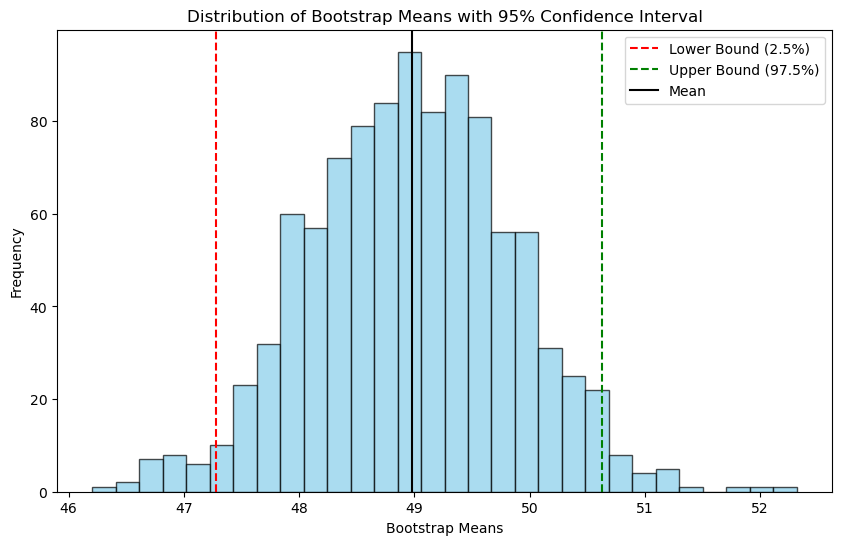

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Set a random seed for reproducibility
np.random.seed(42)

# Generate a normally distributed sample
sample_size = 100
sample = np.random.normal(loc=50, scale=10, size=sample_size)

# Number of bootstrap samples
n_bootstraps = 1000

# Function to calculate the bootstrap means
def bootstrap_means(data, n_bootstraps):
    return np.array([np.mean(np.random.choice(data, size=len(data), replace=True)) for _ in range(n_bootstraps)])

# Bootstrap resampling to get means
bootstrap_means_sample = bootstrap_means(sample, n_bootstraps)

# Calculate the 95% confidence interval for the population mean
confidence_interval = np.percentile(bootstrap_means_sample, [2.5, 97.5])

# Plotting the distribution of bootstrap means
plt.figure(figsize=(10, 6))
plt.hist(bootstrap_means_sample, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(confidence_interval[0], color='red', linestyle='--', label='Lower Bound (2.5%)')
plt.axvline(confidence_interval[1], color='green', linestyle='--', label='Upper Bound (97.5%)')
plt.axvline(np.mean(bootstrap_means_sample), color='k', linestyle='-', label='Mean')
plt.xlabel('Bootstrap Means')
plt.ylabel('Frequency')
plt.title('Distribution of Bootstrap Means with 95% Confidence Interval')
plt.legend()
plt.show()

**In the code above:**

- We generate a normally distributed sample and then bootstrap the sample to obtain bootstrap means.

- The 95% confidence interval for the population mean is calculated based on the bootstrap means.

- To calculate a 95% bootstrap confidence interval for a different population parameter (e.g., median), you would modify the bootstrap_means function to compute the desired parameter (e.g., np.median instead of np.mean).

### Summary of Chat:

https://poe.com/s/Ah5TL9y4Sv8Yn1LGVEXs

In this conversation, we discussed creating a 95% bootstrapped confidence interval using the bootstrapped means directly without relying on the standard deviation to estimate the standard error of the mean. Here's a summary of the key points we covered:

1. **Creating a 95% Bootstrapped Confidence Interval**:
   - Bootstrap Sampling: Generate multiple bootstrap samples by resampling with replacement from the original dataset.
   - Calculate Means: Compute the mean for each bootstrap sample to create a distribution of bootstrapped sample means.
   - Determine Confidence Interval: Find the 2.5th and 97.5th percentiles of the bootstrapped means to establish the lower and upper bounds of a 95% confidence interval.

2. **Generalized Steps**:
   - Bootstrap Sampling: Generate bootstrap samples and calculate the desired parameter for each sample.
   - Confidence Interval Calculation: Determine the confidence interval based on the desired parameter (e.g., median instead of mean).

3. **Python Code**:
   - Provided Python code snippets for generating a 95% bootstrapped confidence interval for the population mean based on a normal distribution.
   - Included modifications to calculate a 95% bootstrap confidence interval for a different population parameter (e.g., median).
   - Added visualization using Matplotlib to display the distribution of bootstrap means along with the confidence interval bounds.

4. **Saving Plot as PNG**:
   - Demonstrated how to save a Matplotlib plot as a PNG image using `savefig()` method for non-interactive display.

If you have any more questions or need further assistance, feel free to ask!

## "Post-lecture" HW

## 5

As seen above, the confidence interval shows us how confident we are that a value will be in a certain range of the data (usually 95% of the data).

It is important to distinguish between the role of the popualation parameter and the sample statistic when it comes to confidence intervals as they use the sample statistic to estimate the population parameter, accounting for uncertainty due to sampling variability. 

## 6

1. What is the process of bootstrapping?
- Bootstrapping is taking multiple sample means from the same set of data in the form of replacement to build up a distribution of the computed statistic across all the resamples.

2. What is the main purpose of bootstrapping?
- Instead of using theoretical distributions that may not truly represent the population, bootstrapping allows you use the actual sample data to estimate the variability.

3. If you had a (hypothesized) guess about what the average of a population was, and you had a sample of size n from that population, how could you use bootstrapping to assess whether or not your (hypothesized) guess might be plausible?
- To bootstrap, randomly pick n amounts of data values in a value set sized n, allowing some data values to be picked more than once. Then find the mean of the set of picked values, and repeat the steps many times until you have a huge set of means on the number line, which creates something like a distribution. The more you do it, the more it looks like a normal distribution.

## 7

Originally, many would assume that because it is in the confidence interval, we can accept H1, but we cannot actually do that. The reason for this is because hypothetically if the interval includes zero, it means zero is a plausible population value, and the data do not provide strong evidence against the null hypothesis, not that it is 100% true.

Rejecting the null hypothesis, such as when the confidence interval does not include zero, it means the population parameter is unlikely to be zero, providing enough evidence to reject the null hypothesis.

## 8

### In the context of this analysis, the Null Hypothesis (H0) stating "no effect" implies that there is no significant difference in the average health improvement before and after the treatment for the patients involved in the study.

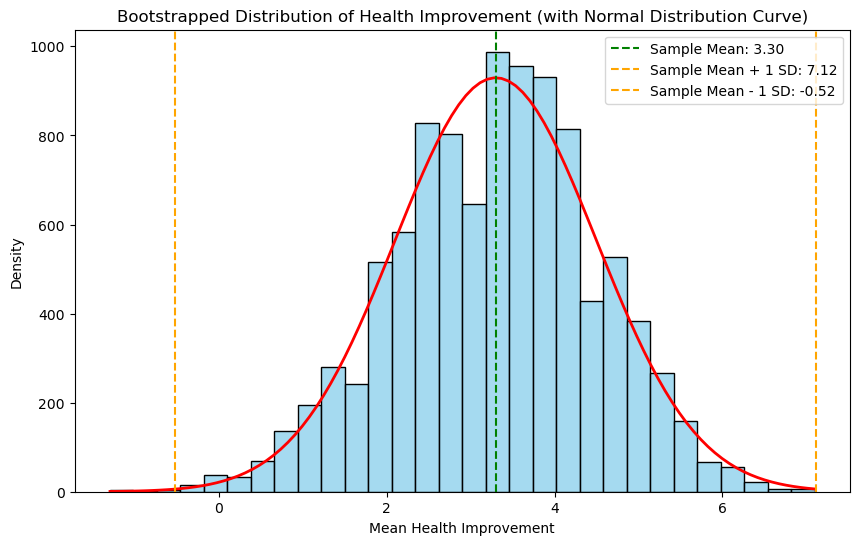

In [4]:
from scipy.stats import norm

# Perform bootstrapping with 10,000 resamples
bootstrap_results = bootstrap(df['HealthImprovement'].values, 10000)

# Calculate the mean and standard deviation of the bootstrapped means
mean_bootstrap = np.mean(bootstrap_results)
std_bootstrap = np.std(bootstrap_results)

# Calculate the sample mean and standard deviation from the original data
sample_mean = np.mean(df['HealthImprovement'])
sample_std = np.std(df['HealthImprovement'])

# Plot the histogram of the bootstrapped means
plt.figure(figsize=(10, 6))
sns.histplot(bootstrap_results, bins=30, color='skyblue', kde=False)

# Generate the x values for the normal distribution curve
x = np.linspace(min(bootstrap_results), max(bootstrap_results), 100)

# Plot the normal distribution curve using the mean and std of the bootstrap results
plt.plot(x, norm.pdf(x, mean_bootstrap, std_bootstrap) * len(bootstrap_results) * (max(bootstrap_results) - min(bootstrap_results)) / 30, color='red', lw=2)

# Add vertical lines for sample mean and one standard deviation above/below the mean
plt.axvline(sample_mean, color='green', linestyle='--', label=f'Sample Mean: {sample_mean:.2f}')
plt.axvline(sample_mean + sample_std, color='orange', linestyle='--', label=f'Sample Mean + 1 SD: {sample_mean + sample_std:.2f}')
plt.axvline(sample_mean - sample_std, color='orange', linestyle='--', label=f'Sample Mean - 1 SD: {sample_mean - sample_std:.2f}')

# Add titles and labels
plt.title('Bootstrapped Distribution of Health Improvement (with Normal Distribution Curve)')
plt.xlabel('Mean Health Improvement')
plt.ylabel('Density')
plt.legend()
plt.show()


**Quantitative analysis of the data:** 

Sample Mean Improvement	3.1

Sample Standard Deviation	2.42

Bootstrap Mean (10,000 resamples)	~3.10

Bootstrap Standard Deviation	~0.72

95% Confidence Interval (Bootstrap)	(1.74, 4.45)

**Then I used hypothesis testing in order to find the test statistic, p-value and critical t value**

In [7]:
from scipy import stats

# Hypothesized population mean (H0)
hypothesized_mean = 0

# Calculate the sample mean and standard deviation
sample_mean = np.mean(df['HealthImprovement'])
sample_std = np.std(df['HealthImprovement'], ddof=1)  # Sample standard deviation
n = len(df['HealthImprovement'])

# Calculate the t-statistic
t_statistic = (sample_mean - hypothesized_mean) / (sample_std / np.sqrt(n))

# Calculate the p-value for a two-tailed test
p_value = stats.t.sf(np.abs(t_statistic), df=n-1) * 2  # two-tailed test

# Calculate the critical t-value for a 95% confidence level
critical_value = stats.t.ppf(1 - 0.025, df=n-1)  # for a two-tailed test

# Display results
t_statistic, p_value, critical_value


(2.5900615612703937, 0.02921052381549256, 2.2621571627409915)

**Through using hypothesis testing, the results above are shown below matching what they are:**

Test Statistic (t): 2.59

p-value:  0.0292

Critical t-value (two-tailed): 2.26

as p-value is less than 0.05

therefore we reject the null hypothesis (H0) as there is sufficient evidence to conclude that the true mean health improvement differs significantly from zero.

## Summary of Chat:

Sure! Here’s a summary of our conversation:

1. **Confidence Intervals**:
   - Discussed the distinction between population parameters and sample statistics in the context of confidence intervals, emphasizing their roles in hypothesis testing and estimation.

2. **Bootstrapping**:
   - Explored the bootstrapping process, which involves resampling to estimate the sampling distribution of a statistic. This method was applied to analyze patient health improvement data from AliTech.

3. **Visualization**:
   - Created visualizations of bootstrapped results, including a distribution curve and sample statistics (mean and standard deviation).

4. **Confidence Interval Analysis**:
   - Calculated a 95% confidence interval for the mean health improvement and checked whether individual patient improvements fell within this interval.

5. **Hypothesis Testing**:
   - Conducted a one-sample t-test to test the null hypothesis of "no effect," which states that the true mean health improvement is equal to zero. 
   - Calculated the test statistic, p-value, and critical value, leading to a conclusion that there is significant evidence to reject the null hypothesis.

6. **Meaning of the Null Hypothesis**:
   - Explained the significance of the null hypothesis of "no effect" in this context, emphasizing its role as a baseline for evaluating the effectiveness of the treatment.

Overall, we conducted a thorough statistical analysis of the health improvement data, utilizing bootstrapping and hypothesis testing to assess the effectiveness of an intervention.


https://chatgpt.com/share/66fb29c1-7394-8013-b2d7-e8c094d6dc24